#Python for Data Science  
*by <a href="https://about.me/gspmoreira">Gabriel Moreira</a>*

This notebook is an example analysis of posts and interactions datasets in a corporative social network (Google+ for Work) (slides <a href="http://www.slideshare.net/gabrielspmoreira/python-for-data-science-48355555">here</a>).    
This analysis follows the <a href="http://www.dataists.com/2010/09/a-taxonomy-of-data-science/">Data Science OSEMN process</a>: Obtain, Scrub, Explore, Model, iNterpret.  


<center><img src="http://gabrielspmoreira.github.io/static_resources/python4datascience_nb/datascience_osemn.png" width=500 /></center>  

#Obtaining

To extract the posts from Google+ for Work we used the Google+ Domain API, and saved them in a JSON lines file.   
Interactions (+1s, comments and reshares) were also extracted using the API and saved in a CSV file.  
The extractor was based in this <a href="https://github.com/gilmar/google-bigdata-training/tree/master/src/main/python/extract">code</a> from a friend of mine (Gilmar).

#Scrubing

##Reading the user interactions (CSV)

Let's read the first line of the CSV

In [15]:
interactions_csv_file = 'datasets/gplus_interactions.csv'
with open(interactions_csv_file, 'r') as f:    
    print f.readline()

z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,109720783232370660451,plusoners



As its a simple CSV, with few columns and without field delimiters, so we can parse it by hand and store in a list

In [16]:
lines = []
with open(interactions_csv_file, 'r') as f:
    for line in f.readlines():
        lines.append(line.split(','))
print "Lines", len(lines)
print lines[0]

Lines 67177
['z13gydngnwuoyzzq004cjlcqmrbgsnaps3o', '109720783232370660451', 'plusoners\n']


Therefore, we will use the *csv* module, which is very efficient to read millions of rows, line by line, using iterators

In [17]:
import csv
from pprint import pprint

def load_interactions_from_csv_file(interactions_csv_file):
    #user_interactions = {}
    interactions = []
    INTERACTIONS_CSV_HEADERS = 'postId,userId,type'
    with open(interactions_csv_file, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')

        headers = INTERACTIONS_CSV_HEADERS.split(',')
        for row in reader:
            try:
                interaction = dict(zip(headers, row))

                #user_index = interaction['userId']
                #if user_index not in user_interactions.keys():
                #    user_interactions[user_index] = []
                interactions.append(interaction)
                #user_interactions[user_index].append(interaction)
            except:
                print "Error parsing line:",str(row)
                raise
    return interactions

interactions = load_interactions_from_csv_file('datasets/gplus_interactions.csv')
print 'Interactions', len(interactions)
pprint(interactions[:3])
#print 'Users:',len(user_interactions)
#print 'Posts first user:', len(user_interactions['103205094494352931790'])
#pprint(user_interactions['103205094494352931790'])

Interactions 67177
[{'postId': 'z13gydngnwuoyzzq004cjlcqmrbgsnaps3o',
  'type': 'plusoners',
  'userId': '109720783232370660451'},
 {'postId': 'z13gydngnwuoyzzq004cjlcqmrbgsnaps3o',
  'type': 'plusoners',
  'userId': '104353693648499998492'},
 {'postId': 'z13gydngnwuoyzzq004cjlcqmrbgsnaps3o',
  'type': 'plusoners',
  'userId': '109532429996108120489'}]


##Reading the users posts (JSON)

We read the first line as a raw text file, to have an ideia of the JSON structure

In [18]:
posts_json_file = 'datasets/gplus_posts.json'
with open(posts_json_file, 'r') as posts_file:
    print posts_file.readline()

{"access": {"description": "CI&T Developers (e-Learning)", "kind": "plus#acl"}, "actor": {"displayName": "Lu\u00eds Felipe Souza", "id": "102949951630555365389", "image": {"url": "https://lh3.googleusercontent.com/-zYeJeeoBn48/AAAAAAAAAAI/AAAAAAAAACQ/EO9fBGYgrXg/photo.jpg?sz=50"}, "url": "https://plus.google.com/102949951630555365389"}, "etag": "\"YfeL5U-JnyEDGe0hBm7Tzx_FfL8/DklCq4ugbEK2DB5ZK6kb84_j1Qc\"", "id": "z13gydngnwuoyzzq004cjlcqmrbgsnaps3o", "kind": "plus#activity", "object": {"attachments": [{"content": "Workshop BeMEAN ONLINE", "displayName": "Workshop BeMEAN ONLINE", "fullImage": {"type": "image/jpeg", "url": "http://bemean.com.br/images/webschool-pb-medium.png"}, "image": {"height": 120, "type": "image/jpeg", "url": "https://lh4.googleusercontent.com/proxy/euFZA4_NFulzqeLHAlx-PXYLDgEPCLRngeDAwUleCegTE8F0i2BKW9vYDHvsU1k7T-hnoFBV-FCxJN6IENmvbJH50w=w120-h120", "width": 120}, "objectType": "article", "url": "http://bemean.com.br"}], "content": "Curso online de AngularJS, NodeJ

Then, we can open the file using UTF-8 encoding, using the *codecs* module, and parse the JSON entry to a Python dict using *json* module.

In [19]:
import codecs, json
firstLine = None
posts_json_file = 'datasets/gplus_posts.json'
with codecs.open(posts_json_file, 'r', encoding='utf-8') as jsonfile:
    firstLine = json.loads(jsonfile.readline())
pprint(firstLine)

{u'access': {u'description': u'CI&T Developers (e-Learning)',
             u'kind': u'plus#acl'},
 u'actor': {u'displayName': u'Lu\xeds Felipe Souza',
            u'id': u'102949951630555365389',
            u'image': {u'url': u'https://lh3.googleusercontent.com/-zYeJeeoBn48/AAAAAAAAAAI/AAAAAAAAACQ/EO9fBGYgrXg/photo.jpg?sz=50'},
            u'url': u'https://plus.google.com/102949951630555365389'},
 u'etag': u'"YfeL5U-JnyEDGe0hBm7Tzx_FfL8/DklCq4ugbEK2DB5ZK6kb84_j1Qc"',
 u'id': u'z13gydngnwuoyzzq004cjlcqmrbgsnaps3o',
 u'kind': u'plus#activity',
 u'object': {u'attachments': [{u'content': u'Workshop BeMEAN ONLINE',
                               u'displayName': u'Workshop BeMEAN ONLINE',
                               u'fullImage': {u'type': u'image/jpeg',
                                              u'url': u'http://bemean.com.br/images/webschool-pb-medium.png'},
                               u'image': {u'height': 120,
                                          u'type': u'image/jpeg',
 

After parsing the JSON, we can retrieve the content of the post in the dict

In [20]:
firstLine['object']['content']

u'Curso online de AngularJS, NodeJS e MongoDB.<br /><br />Um amigo me recomendou esse curso:\xa0<a href="http://bemean.com.br/">http://bemean.com.br/</a><br /><br />N\xe3o tenho muitas refer\xeancias sobre o instrutor, mas pelo conte\xfado parece ser bacana!<br /><br />Se algu\xe9m algu\xe9m conhecer, compartilha a\xed!\ufeff'

We will further analyse the posts text, and the URLs can add noise to that. Using the native regex parser in Python, we can drop off all URLs.

In [21]:
import re
def remove_urls_from_text(text):
    without_url = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?""'']))', ' ', text)
    return without_url
print remove_urls_from_text(firstLine['object']['content'])

Curso online de AngularJS, NodeJS e MongoDB.<br /><br />Um amigo me recomendou esse curso: <a href=" "> </a><br /><br />Não tenho muitas referências sobre o instrutor, mas pelo conteúdo parece ser bacana!<br /><br />Se alguém alguém conhecer, compartilha aí!﻿


We already have HTML markups in the text, so we will use the excelent BeautifulSoup (external module) to parse and extract the tags (too lazy to do a regex for that)

In [22]:
from bs4 import BeautifulSoup
def remove_html_tags_from_text(html_text):
    raw_content = BeautifulSoup(html_text).get_text(' ')
    return raw_content
print remove_html_tags_from_text(remove_urls_from_text(firstLine['object']['content']))

Curso online de AngularJS, NodeJS e MongoDB. Um amigo me recomendou esse curso:    Não tenho muitas referências sobre o instrutor, mas pelo conteúdo parece ser bacana! Se alguém alguém conhecer, compartilha aí!﻿


The field "published" contains the post published date, in ISO 8601 format.

In [23]:
firstLine['published']

u'2015-03-18T19:40:06.667Z'

To be useful in Python, we need to parse this date

In [24]:
import dateutil.parser
dateutil.parser.parse(firstLine['published'])

datetime.datetime(2015, 3, 18, 19, 40, 6, 667000, tzinfo=tzutc())

Putting it all together, this method parses all lines from the posts json file, and stores only the fields we will need in a dict. It cleans from the content the Urls and HTML markups and dates are converted to Python format.
Additionally, we insert an artificial "age" field for further usage in tha analysis, with random values between 0-100, and about random 25% of null values 

In [25]:
import json, random
def load_posts_from_json_lines_file(posts_json_file):
    posts = {}
    user_posts = {}
    with codecs.open(posts_json_file, 'r', encoding='utf-8') as jsonfile:
        for line in jsonfile.readlines():
            try:
                post_json = json.loads(line.strip())
                                  
                html_content = post_json['object']['content']
                html_content_without_urls = remove_urls_from_text(html_content)
                text_content = remove_html_tags_from_text(html_content_without_urls)

                if u'was tagged in' in html_content:
                    continue

                post = {'postId': post_json['id'],
                        'origin': post_json['access']['description'],
                        'title': post_json['title'],
                        'content': text_content,
                        'userName': post_json['actor']['displayName'],
                        'userId': post_json['actor']['id'],
                        'userImageUrl': post_json['actor']['image']['url'],
                        'profileUrl': post_json['actor']['url'],
                        'postUrl': post_json['url'],
                        'provider': post_json['provider']['title'],
                        'published': dateutil.parser.parse(post_json['published']),
                        'updated': dateutil.parser.parse(post_json['updated']),
                        'indexedContent': text_content,
                        'age': (random.random() * 100) if (random.random() <= 0.75) else None
                        }

                user_index = post['userId']
                if user_index not in user_posts.keys():
                    user_posts[user_index] = []
                user_posts[user_index].append(post['postId'])

                posts[post['postId']] = post
            except:
                print "Unexpected error processing line '",line.encode('ascii','ignore')
                raise
    return posts, user_posts

posts, user_posts = load_posts_from_json_lines_file('datasets/gplus_posts.json')

After parsing all the lines, we can see the posts and unique users counts. We stored the posts in a dict indexed by the userId.

In [12]:
print "Posts:",len(posts)
print "Users:",len(user_posts)

print "\nPosts from a user:", user_posts['103205094494352931790'][:3], "\n"
pprint(posts['z12rz1tyzsywezsec22lurhq2wq0wl5ca'])

Posts: 8385
Users: 833

Posts from a user: [u'z12rz1tyzsywezsec22lurhq2wq0wl5ca', u'z12gjfeyfziegjfcz22lurhq2wq0wl5ca', u'z13xvneb0tr3db02a22lurhq2wq0wl5ca'] 

{'age': None,
 'content': u'Primeiras estat\xedsticas sobre Apple Watch. Estou falando tanto disso que acho que a Apple podia me dar um :) .The top-developed category is Utility, comprising 373 (12%) of all apps. .Surprisingly, Health & Fitness tied with Lifestyle for 4th, each accounting for 7% of all Watch-developed apps. This differs significantly from Android-based wearables. .The least-developed categories for the Apple Watch are Catalogs, Books, Weather, Photo & Video, and Medical, which all clocked in at under 2% per category.\ufeff',
 'indexedContent': u'Primeiras estat\xedsticas sobre Apple Watch. Estou falando tanto disso que acho que a Apple podia me dar um :) .The top-developed category is Utility, comprising 373 (12%) of all apps. .Surprisingly, Health & Fitness tied with Lifestyle for 4th, each accounting for 7% of

##Pandas to the resque
Pandas is a great module for data munging and exploratory analysis. Its core concept is the DataFrame, a handiful construct for data manipulation, found also in R and MatLab.
We can easily convert a list of dictionaries (rows) to a DataFrame.

In [13]:
import pandas as pd
df = pd.DataFrame(posts.values())
df.head(3)

,age,content,indexedContent,origin,postId,postUrl,profileUrl,provider,published,title,updated,userId,userImageUrl,userName
0,8.237756,"Olá, Algum projeto tem impressora zebra para t...","Olá, Algum projeto tem impressora zebra para t...",CI&T Developers (Discussion),z12vyhfr5zj4ehzxi04cdbuobqrnf5dhryk0k,https://plus.google.com/+ValquiriadeCarvalhoOl...,https://plus.google.com/100639527798050818921,Community,2014-10-10 17:33:45.790000+00:00,"Olá,\n\nAlgum projeto tem impressora zebra par...",2014-10-10 17:33:45.790000+00:00,100639527798050818921,https://lh3.googleusercontent.com/-0gILGSiSPXA...,Valquiria de Carvalho Oliveira
1,NaN,"Máquina de Café sem café! Galera, bom dia! Já...","Máquina de Café sem café! Galera, bom dia! Já...",Domain,z13zt1gzxsf2dlans230zbsr0qzwzbodd,https://plus.google.com/111310394464404087471/...,https://plus.google.com/111310394464404087471,Community,2015-03-27 12:37:33.782000+00:00,"Máquina de Café sem café!\nGalera, bom dia! J...",2015-03-27 12:37:33.782000+00:00,111310394464404087471,https://lh3.googleusercontent.com/-jkXrx-U7FDo...,Luiz Finhana Junior
2,32.431978,Did you ever wonder how great it would be if y...,Did you ever wonder how great it would be if y...,CI&T Developers (Architecture),z121itaiezmtzbp5j04cg5owalnmwjqab20,https://plus.google.com/+JoãoVitorLacerdaGuima...,https://plus.google.com/108804428940930075609,Community,2014-03-10 01:40:23.984000+00:00,Did you ever wonder how great it would be if y...,2014-03-10 01:40:23.984000+00:00,108804428940930075609,https://lh3.googleusercontent.com/-FLpvDQBLP1w...,João Vitor Lacerda Guimaraes


We can explore the schema of the DataFrame

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8385 entries, 0 to 8384
Data columns (total 14 columns):
age               6301 non-null float64
content           8385 non-null object
indexedContent    8385 non-null object
origin            8385 non-null object
postId            8385 non-null object
postUrl           8385 non-null object
profileUrl        8385 non-null object
provider          8385 non-null object
published         8385 non-null object
title             8385 non-null object
updated           8385 non-null object
userId            8385 non-null object
userImageUrl      8385 non-null object
userName          8385 non-null object
dtypes: float64(1), object(13)

And conduct many operations of SQL (relational algebra), like project, select, union, join, etc.
Here we project only three columns.

In [15]:
df[['postId', 'origin', 'title']][0:5]

,postId,origin,title
0,z12vyhfr5zj4ehzxi04cdbuobqrnf5dhryk0k,CI&T Developers (Discussion),"Olá,\n\nAlgum projeto tem impressora zebra par..."
1,z13zt1gzxsf2dlans230zbsr0qzwzbodd,Domain,"Máquina de Café sem café!\nGalera, bom dia! J..."
2,z121itaiezmtzbp5j04cg5owalnmwjqab20,CI&T Developers (Architecture),Did you ever wonder how great it would be if y...
3,z13ev10pbqqei544i04cg15belrncdwzgbk,Shared privately,2015 Guide to Social Media Image Sizes – Infog...
4,z12bfx5zjuvcuxc0v22yjpgaqsrjchupm04,Shared privately,"Para cada super profissional, super mãe, super..."


It is possible to access columns series like "properties". In this example, we get the count of distinct user names that posted in the database

In [16]:
df.userName.unique().shape

(831,)

It is possible to select (subset) rows by multiple conditions in a declarative way.

In [17]:
df[(df.age >= 50) & (df.age < 75)].age.head(10)

4     57.032175
8     58.056466
9     68.676876
13    73.524051
14    68.577247
17    55.700999
18    50.434476
22    61.329638
28    72.196465
30    64.793903
Name: age, dtype: float64

We can get the total of null values in age column

In [18]:
df.age.isnull().sum()

2084

Dealing with null values is an important aspect of data munging. You can ignore all lines with null values, but it can reduce very precious rows from your dataset. 
Other approach is to fill up the null values with a default values. In this case, we will use the mean value of the age column to fill the blank ages.

In [19]:
df.loc[df.age.isnull(), 'age'] = df.age.dropna().mean()
df.age.isnull().sum()

0

With this filling of null age values with the mean, obviously the column mean will remain the same.

In [20]:
df.age.dropna().mean()

49.984904390880956

Pandas uses matplotlib for easy charting from DataFrame. Here we plot a histogram of the random age field, where the range around the mean have more examples, since we artificially set the null values to the mean.

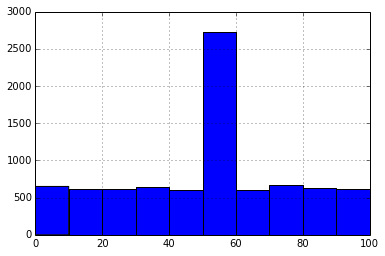

In [21]:
%matplotlib inline
df['age'].hist()

#Exploring

After some data munging and exploring some Pandas features, let's address some business questions about this corporative social network database.

*Question 1*: **Which communities are more popular?**

Let's take a look in the origin column. The community names are the first part of the field, and the section/category of the community where user posted is embraced by parenthesys.

In [22]:
df['origin'].head(10)

0                       CI&T Developers (Discussion)
1                                             Domain
2                     CI&T Developers (Architecture)
3                                   Shared privately
4                                   Shared privately
5                 [CI&T] What's On Brazil (Wellness)
6                                             Domain
7           CI&T Developers (Linux, Mac OS, Windows)
8                                             Domain
9    [CI&T] What's On USA (Corporate News (HR Only))
Name: origin, dtype: object

Let's get rid of the categories section, transforming the field to extract only the first part before parenthesys.

In [55]:
df['community'] = df['origin'].map(lambda o: o.split('(')[0])
df['community'].head(10)

0            CI&T Developers 
1                      Domain
2            CI&T Developers 
3            Shared privately
4            Shared privately
5    [CI&T] What's On Brazil 
6                      Domain
7            CI&T Developers 
8                      Domain
9       [CI&T] What's On USA 
Name: community, dtype: object

To answer *Question 1*, we need to sum up the total of posts in all communities, and sort them by cound. Pandas groupby and sort methods make that easy.

In [60]:
community_groups = df.groupby('community').size()
community_groups.sort(ascending=False)
print community_groups

community
CI&T Developers                                 2595
Domain                                          1583
Shared privately                                1216
[CI&T] What's On Brazil                          710
[CI&T] Managers                                  429
[CI&T] What's On USA                             321
​[CI&T] Career in Motion & People Awards         314
CI&T+                                            277
CI&T Digital Talk                                255
[CI&T] Our Achievements                          117
D1                                               104
CI&T + Google                                     90
CI&T BIG Data & Analytics - A Digital Force       85
Community                                         72
cit-oldschool                                     61
D-Coder                                           45
DEPRECATED - Smart Computing                      40
Google Cloud Experts                              30
CI&T Google Sales                   

Tables are nice, but charts may answer better *Question 1*, showing the most popular communities in terms of posts count.

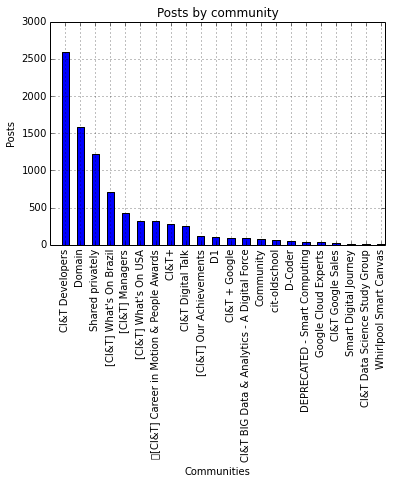

In [25]:
%matplotlib inline
my_plot = community_groups.plot(kind='bar', title='Posts by community')
my_plot.set_xlabel("Communities")
my_plot.set_ylabel("Posts")

*Question 2* - **Is the engagement of users in corporate communities increasing? **

To address this question, we will try to analyse the evolution of posts count grouped by month.  
To do that, we create an additional column in the DataFrame, extracting the month of post published date. 

In [26]:
df['publishedMonth'] = df.published.map(lambda d: format(d.year, '02') + '-' + format(d.month, '02') )
df[['published','publishedMonth']][:10]

,published,publishedMonth
0,2014-10-10 17:33:45.790000+00:00,2014-10
1,2015-03-27 12:37:33.782000+00:00,2015-03
2,2014-03-10 01:40:23.984000+00:00,2014-03
3,2015-02-03 10:38:59.696000+00:00,2015-02
4,2013-03-08 12:51:31.443000+00:00,2013-03
5,2015-02-18 13:07:08.554000+00:00,2015-02
6,2014-08-20 15:23:37.057000+00:00,2014-08
7,2014-03-26 21:29:05.318000+00:00,2014-03
8,2014-10-28 12:24:06.018000+00:00,2014-10
9,2013-09-06 23:04:22.143000+00:00,2013-09


Now we can group posts count by post published month and plot the series as a line chart.
Looking to this chart, we observe an increasing trend of posts in the corporate communities since Jan 2013.  
As the company team size have not grow at this rate, we can answer for *Question 2* that the engament of users is really increasing.

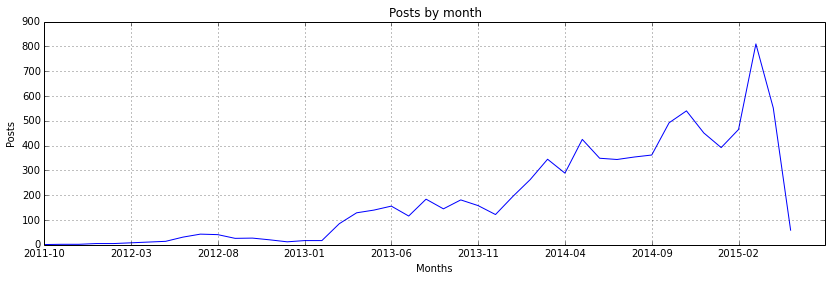

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

months_groups = df.groupby('publishedMonth').size()
my_plot = months_groups.plot(kind='line', title='Posts by month' , figsize=(14, 4))
my_plot.set_xlabel("Months")
my_plot.set_ylabel("Posts")

*Question 3* - **What is the distribution of posts publishing time, during the day? **

To answer this question, we need again to use published column, to extract the publishing hour to a new column.

In [29]:
df['publishedHour'] = df.published.map(lambda d: d.hour )
df[['published','publishedHour']][:10]

,published,publishedHour
0,2014-10-10 17:33:45.790000+00:00,17
1,2015-03-27 12:37:33.782000+00:00,12
2,2014-03-10 01:40:23.984000+00:00,1
3,2015-02-03 10:38:59.696000+00:00,10
4,2013-03-08 12:51:31.443000+00:00,12
5,2015-02-18 13:07:08.554000+00:00,13
6,2014-08-20 15:23:37.057000+00:00,15
7,2014-03-26 21:29:05.318000+00:00,21
8,2014-10-28 12:24:06.018000+00:00,12
9,2013-09-06 23:04:22.143000+00:00,23


Analogously, we group posts count by by the hour of publishing, and can easily plot the result in a bar chart.  
We can observe picks of posts around lunch and in the end of afternoon, as expected, answering *Question 3*.

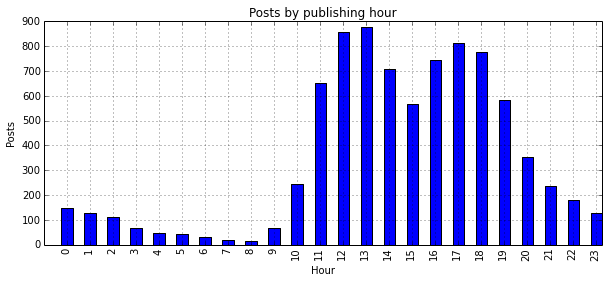

In [30]:
byhour_groups = df.groupby('publishedHour').size()
my_plot = byhour_groups.plot(kind='bar', title='Posts by publishing hour' , figsize=(10, 4))
my_plot.set_xlabel("Hour")
my_plot.set_ylabel("Posts")

*Question 4* - **What is the percentage of interactions (likes and comments)? **

Now we will start to use the dataset of user interactions dataset. Again, we can easily convert our list to a DataFrame.

In [68]:
df_interactions = pd.DataFrame(interactions)
df_interactions.head(10)

,postId,type,userId
0,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,109720783232370660451
1,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,104353693648499998492
2,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,109532429996108120489
3,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,113895504962207208172
4,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,103185489532705296142
5,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,107551832109217323701
6,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,116065736764509847471
7,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,plusoners,108393107997795956129
8,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,replies,108393107997795956129
9,z13gydngnwuoyzzq004cjlcqmrbgsnaps3o,replies,100031837120064783282


Using describe(), we get some quick statistics: there was ~67 interactions in 6862 different posts, from 1606 users.

In [32]:
df_interactions.describe()

,postId,type,userId
count,67177,67177,67177
unique,6862,2,1606
top,z12ej3wb0t2pd5crj04cfbgweyz2vpjyehg,plusoners,108393107997795956129
freq,40,45482,868


Grouping interactions by type, we can observe in the pie chart that +1 (~67%) are more frequent than comments (32%), answering *Question 4*.

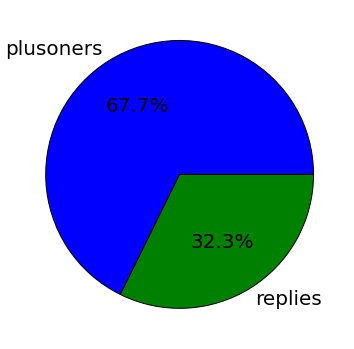

In [33]:
bytype_group = df_interactions.groupby('type').size()
bytype_group.plot(kind='pie', autopct='%.1f%%', fontsize=20, figsize=(6, 6))

*Question 5* - **How is the distribution of interactions by user?**

Here we would like to analyze the distribution of interactions by user. We use a boxplot, which summarizes visually statistics like the minimum, maximum, median, quartiles (see describe() results below) and identifies possible outliers.  
We can see that 75% of users have done at most 40 interactions (+1s and comments), and some of them have more than 100 interactions, been considered outliers. That answers *Question 5*.

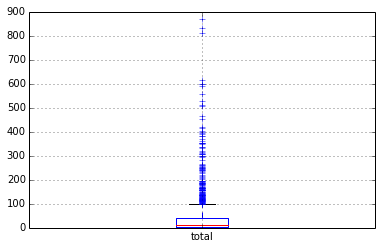

In [80]:
byusers_group = df_interactions.groupby('userId').userId.agg({'total': len})
myplot = byusers_group.boxplot(figsize=(10, 6), return_type='dict')

In [39]:
byusers_group.describe()

count    1606.000000
mean       41.828767
std        81.184156
min         1.000000
25%         4.000000
50%        13.000000
75%        41.750000
max       868.000000
dtype: float64

About 10% of the users can be considered hard users of corporate social network.  
Disclaimer: here we are not considering how long persons work for the company, for the sake of simplicity.

In [86]:
outlier_users = byusers_group[byusers_group['total'] > 100].shape[0]
print "User with more than 100 interactions:",outlier_users, "(",float(outlier_users)/len(byusers_group)*100,"%)"
print "All users:",byusers_group.shape[0]

User with more than 100 interactions: 163 ( 10.1494396015 %)
All users: 1606


*Question 6* - **Is there a relationship between publishing hour and number of interactions? **

Is there a common sense that posting at some specific periods of the day (like at 10am), your post have more chance to be viewed. Let's try to see if this behaviour occurs in this dataset.

First at all, we need to join the posts DataFrame (with publishing hour) to the interactions DataFrame.
We can do this using Pandas's join() method. You can join/merge frames using specific fields. 
In this case, we first create indexes on both dataframes on join columns, in order to speed up the join.  
P.s. The reset_index() is important here, so that we can set indexes only on the join columns.

In [41]:
df_postId = df.reset_index().set_index('postId', append=False)
dfInteracions_postId = df_interactions.reset_index().set_index('postId', append=False)

df_posts_interactions_joined = df_postId.join(dfInteracions_postId, lsuffix='_p', rsuffix='_i').reset_index()
df_posts_interactions_joined[['postId','published', 'type']].head(10)

,postId,published,type
0,z120c3bw4lbovvfqg04cjf1xypvbd15gt3s,2014-09-29 11:04:08.416000+00:00,NaN
1,z120c5opxl32zf2nu22my3mynzrygbj5y04,2014-05-07 03:30:24.260000+00:00,plusoners
2,z120c5zyxqrehl1wp04ccrtjbvvohrc4mw00k,2013-11-01 14:14:41.993000+00:00,NaN
3,z120d3vbkmijwxkyu04cednprtzkijdxl0w,2013-10-23 16:55:09.889000+00:00,plusoners
4,z120d3vbkmijwxkyu04cednprtzkijdxl0w,2013-10-23 16:55:09.889000+00:00,plusoners
5,z120dbu51kixibkdy23sjnybwmbdxxeqp04,2015-01-07 19:18:44.438000+00:00,plusoners
6,z120dbu51kixibkdy23sjnybwmbdxxeqp04,2015-01-07 19:18:44.438000+00:00,plusoners
7,z120dbu51kixibkdy23sjnybwmbdxxeqp04,2015-01-07 19:18:44.438000+00:00,plusoners
8,z120dbu51kixibkdy23sjnybwmbdxxeqp04,2015-01-07 19:18:44.438000+00:00,plusoners
9,z120dbu51kixibkdy23sjnybwmbdxxeqp04,2015-01-07 19:18:44.438000+00:00,plusoners


With the joined frames, we group posts count by published hour and the post id.

In [42]:
byHour_Posts_groups = df_posts_interactions_joined.groupby(['publishedHour','postId']).postId.agg({'count': len})
byHour_Posts_groups.head(10)

count
publishedHour postId                                      
0             z120s5oiqkbcybptg22byjahauzgcvdyx04       35
              z122hnuibt2si55ub22kxropgsemjpihh04        2
              z122wfcwdx22znsmx23yjvriokq5gdjvq          1
              z122zxvzgt2wdbmco23icrpq0nbkzdv3t          3
              z123sboxvqebcjb5i04cetwgclnvj5t4nws0k     18
              z124fpapqz20vlxuf231hb1ogwr3xllsk          2
              z124gvaqetewxjkml222yriq5sebehgo404        1
              z124svz5jvb1vraqo04cgbjxfrupd1figgo       15
              z124w3dyrr2mxdn2q22ljpjptryph3rqr04        9
              z124wrwaauygwjlga04ccpmjoqrsezw4by00k      2

From that grouping, we now group only by published hour, calculating the mean of interactions of posts published at that hour.

In [43]:
byHour_avgint = byHour_Posts_groups.reset_index().groupby('publishedHour')['count'].agg({'avg': np.mean})
byHour_avgint.head(10)

,avg
publishedHour,
0,5.966216
1,6.234375
2,7.990991
3,6.630769
4,7.425532
5,8.857143
6,8.125000
7,9.941176
8,2.307692


Plotting that as a scatter plot, we can observe some influence of the time the post is published and the total of interactions it receives. Posts published at 10am appear to be the among the periods with largest average interactions, but the difference is not as large as expected. A possible explanation is that +1s and comments continues to occur many hours and even days after posting, minimizing the effect of post time.

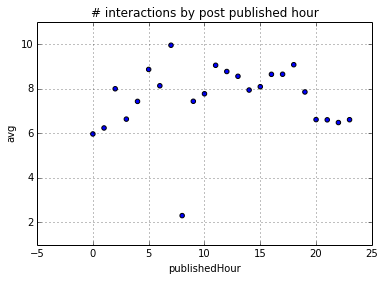

In [44]:
byHour_avgint.reset_index().plot(kind='scatter', x='publishedHour', y='avg', title='# interactions by post published hour')

*Question 7* - **What communities are more engaging**?

To answer that, we will again use our joined dataset. Analogously, we first group by posts to get interactions count, and after by community, averaging interactions by posts.
We can see in the bar chart that the two more engaging communites are related to posts of awards, promotions and recognitions of company professionals, usually very liked and commented by colleages.

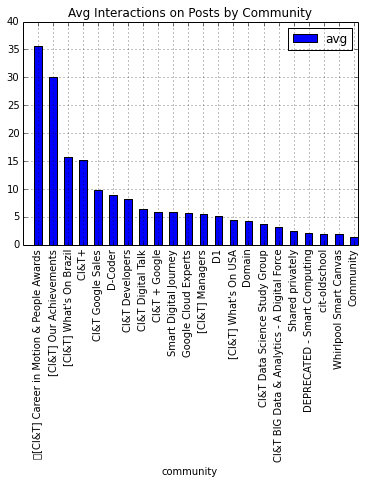

In [45]:
byCommunityPosts_int_groups = df_posts_interactions_joined.groupby(['community','postId']).postId.agg({'count': len})
byCommunity_avgint = byCommunityPosts_int_groups.reset_index().groupby('community')['count'].agg({'avg': np.mean})
byCommunity_avgint = byCommunity_avgint.sort('avg', ascending=False)
byCommunity_avgint.plot(kind='bar', title='Avg Interactions on Posts by Community')

#Modeling

No, let's switch gears from exploratory analysis to a useful model for our data.
Imagine you want to know what the most relevant terms in the corporative posts - what people are talking about.

The first step is to remove meaninless "stop" words like some pronouns, prepositions, conjunctions and some verbs. We read those words from text files.

In [9]:
import codecs
def load_from_file(filename, encoding=None):
    result = []
    line_count = 0
    try:
        with codecs.open(filename, 'r', encoding) as f:   
            for line in f.readlines():
                line_count += 1
                result.append(line.strip())
    except:
        print "Error on file",filename," - line",line_count
        raise
    return result

stop_words = []
for stop_file in ['stopwords/english_stop_words.txt','stopwords/portuguese_stop_words.txt','stopwords/custom_stop_words.txt']:
    stop_words += load_from_file(stop_file, 'utf-8') 
stop_words[:10]

[u'a',
 u'about',
 u'above',
 u'according',
 u'across',
 u'actually',
 u'after',
 u'again',
 u'against',
 u'all']

Let's take another look on our posts content, remembering we already cleaned HTML markup and urls

In [121]:
map(lambda c: c['content'], posts.values())[:3]

[u"Ol\xe1, Algum projeto tem impressora zebra para testes? []'s\ufeff",
 u'M\xe1quina de Caf\xe9 sem caf\xe9! Galera, bom dia!\xa0 J\xe1 abri um Jira para o time de SS informando que a m\xe1quina est\xe1 sem caf\xe9. Abra\xe7os.\ufeff',
 u'Did you ever wonder how great it would be if you could write your  jmeter tests in ruby ? This projects aims to do so. If you use it on your project just let me now.   --------------- On the Architecture Academy you can read how jmeter can be used to validate your Architecure. modulo 13   arch definition   architecture validation | academia de arquitetura \ufeff']


We'll use a technique from Information Retrieval call TF-IDF. It identifies the most "important" terms in a text considering its relative frequency in the text, and the frequency where this terms occur on other texts.  
<img src="http://gabrielspmoreira.github.io/static_resources/python4datascience_nb/TF-IDF.png" width="500" />
Scikit-learn contains an implementation of this feature extraction, so let's use it!

In [33]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def compute_post_content_profiles():        
    posts_content = map(lambda c: c['content'], posts.values())
    print "Computing profiles for",len(posts_content),"posts"
    vectorizer = TfidfVectorizer(input=posts_content, max_features=10000, stop_words=stop_words, 
                           max_df=1.0, ngram_range=(1, 2), token_pattern=r"(?u)[\b\#a-zA-Z][\w&-_]+\b")

    tfidf_sparce_matrix = vectorizer.fit_transform(posts_content)   

    print "Returning calculated sparce matrix values and feature names"
    return tfidf_sparce_matrix, vectorizer.get_feature_names()
    
tfidf_sparce_matrix, tfidf_feature_names = compute_post_content_profiles()
tfidf_feature_names[-10:]

Computing profiles for 8385 posts
Returning calculated sparce matrix values and feature names


[u'youtube',
 u'yuri',
 u'zamariola',
 u'zanchetta',
 u'zara',
 u'zend',
 u'zeno',
 u'zero',
 u'zhang',
 u'zone']

Here we have returned a sparce vector for each post content (8385), with the TF-IDF for 10,000 terms

In [39]:
tfidf_sparce_matrix

<8385x10000 sparse matrix of type '<type 'numpy.float64'>'
	with 203912 stored elements in Compressed Sparse Row format>

To validate the results, let's take a look in the content of one post.

In [122]:
posts['z121itaiezmtzbp5j04cg5owalnmwjqab20']['content']

u'Did you ever wonder how great it would be if you could write your  jmeter tests in ruby ? This projects aims to do so. If you use it on your project just let me now.   --------------- On the Architecture Academy you can read how jmeter can be used to validate your Architecure. modulo 13   arch definition   architecture validation | academia de arquitetura \ufeff'

We can extract, the TF-IDF vector for the post

In [49]:
def get_post_profile_values(post_id):
    post_idx = posts.keys().index(post_id)
    profile_values = tfidf_sparce_matrix[post_idx:post_idx+1]
    return profile_values
post_profile = get_post_profile_values('z121itaiezmtzbp5j04cg5owalnmwjqab20')
post_profile

<1x10000 sparse matrix of type '<type 'numpy.float64'>'
	with 18 stored elements in Compressed Sparse Row format>

And converting the sparce vector to a dense one, we can see we are really saving memory here, as most of the values are zeroes.

In [50]:
post_profile.todense()

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

It's possible to retrieve the most "important" words for a post

In [116]:
def get_post_profile_sorted_features(post_id):
    profile_values = get_post_profile_values(post_id)
    tfidf_values = profile_values.todense().flatten().tolist()[0]
    tfidf_feature_values = zip(tfidf_feature_names, tfidf_values)
    sorted_tfidf_feature_values = sorted(tfidf_feature_values, key=lambda c: c[1], reverse=True)
    return filter(lambda p: p[1] > 0, sorted_tfidf_feature_values)
post_features = get_post_profile_sorted_features('z121itaiezmtzbp5j04cg5owalnmwjqab20')
post_features

[(u'jmeter', 0.4666724240839286),
 (u'architecture', 0.38058070866559457),
 (u'validate', 0.24306678628555473),
 (u'validation', 0.24306678628555473),
 (u'definition', 0.23946784408109584),
 (u'write', 0.2259673384214501),
 (u'academia arquitetura', 0.21828825206160904),
 (u'academy', 0.21663619068092696),
 (u'ruby', 0.21357807130947726),
 (u'tests', 0.2094979271540951),
 (u'did', 0.18646590784006095),
 (u'academia', 0.18150002942528334),
 (u'read', 0.1804981136860875),
 (u'used', 0.17678984867315153),
 (u'projects', 0.17309405791732885),
 (u'arquitetura', 0.15309741462246657),
 (u'now', 0.14861784396401714),
 (u'project', 0.14030872100742647)]

And seing that a word cloud is not bad, hah!  
<a href="https://github.com/amueller/word_cloud">A nice WordCloud module for Python</a>

<module 'matplotlib.pyplot' from '/usr/lib/pymodules/python2.7/matplotlib/pyplot.pyc'>

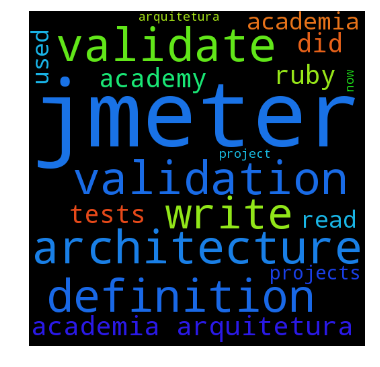

In [118]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from scipy.misc import imread
%matplotlib inline

wordcloud = WordCloud(width=500, height=500).generate_from_frequencies(post_features)
plt.figure(figsize = (6,6))
plt.imshow(wordcloud)
plt.axis("off")
plt

What if we wanna select other posts with related subjects?  
As we have the feature vectors for all posts, we can usine cosine similarity to retrieve the most similar posts!
<img src="http://gabrielspmoreira.github.io/static_resources/python4datascience_nb/Vector_space_model.jpg"/ width="350">

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_similarity_with_all_profiles(post_profile_to_compare):
    return cosine_similarity(post_profile_to_compare, tfidf_sparce_matrix).flatten()
post_profile = get_post_profile_values('z121itaiezmtzbp5j04cg5owalnmwjqab20')
similarities = compute_similarity_with_all_profiles(post_profile)
similarities[:10]

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

Now we sort the posts by the similarity with our post

In [78]:
def get_most_similar_profiles(limit=10, min_similarity=0.0, max_similarity=1.0):
    similar_profiles_sorted_idxs = similarities.argsort()   

    similar_profiles = map(lambda idx: (posts.keys()[idx], similarities[idx]), similar_profiles_sorted_idxs)
    similar_profiles_filtered = filter(lambda c: c[1] > 0 and c[1] >= min_similarity and c[1] <= max_similarity, similar_profiles)
    most_similar_profiles = similar_profiles_filtered[:-(limit+1):-1]
    return most_similar_profiles
get_most_similar_profiles(10)

[(u'z13dtnjpgsrev1byv04cilm52xixdznzfis', 0.30418960034143339),
 (u'z13zxtn4mz3th1cxo04chhqaqp3ndxy43o40k', 0.30148446183361999),
 (u'z12bsdromyyxvlfwq04cjtzixum2spl5zis', 0.28589980031411566),
 (u'z12bvviylva5cdoko233wtbahmn3sxhdv', 0.2589013967439493),
 (u'z12lhnlgcubtjxsid04cizdxikyqwp2p5ek', 0.22485325812740381),
 (u'z132sx0ykmiovdpww04cefsifujyztkxwrs0k', 0.21668122589883021),
 (u'z125ehjwdmifcjmmg23khjyznsq1frhqp04', 0.21454409900860802),
 (u'z12hezoi1rergxxwy04cjfuovpmozj2yqrw0k', 0.21447630260653774),
 (u'z12qjzxwiliaefmrp04cjfuovpmozj2yqrw0k', 0.21447630260653774),
 (u'z13bi1wrxqjxjp3v523pzx3zdpzozvdmj', 0.19902702425041319)]

Let's take a look in one of the "similar" posts. We can see that its also talking jmeter, performance tests and architecture!

In [114]:
get_post_profile_sorted_features('z13zxtn4mz3th1cxo04chhqaqp3ndxy43o40k')

[(u'enterprise architecture', 0.587317262320221),
 (u'architecture', 0.4522039167279558),
 (u'enterprise', 0.43763277341513884),
 (u'jmeter', 0.2772488110860989),
 (u'performance', 0.24318719121845023),
 (u'monitoramento', 0.17291260488751897),
 (u'dados', 0.10772802690708962),
 (u'disponibilizados', 0.09356971754399507),
 (u'testes performance', 0.09356971754399507),
 (u'identify', 0.0903945758947097),
 (u'c\xe1lculo', 0.08348982174847344),
 (u'planning', 0.08200608409096674),
 (u'testing', 0.08110922677921757),
 (u'definir', 0.0802742725974557),
 (u'relacionados', 0.07875954379490582),
 (u'knowledge', 0.07709913094817035),
 (u'requisitos', 0.07484106108512129),
 (u'gera\xe7\xe3o', 0.07272073497547461),
 (u'testes', 0.05578274630334446),
 (u'base', 0.05466327317564993)]

Here is the "similar" post content.

In [82]:
posts['z13zxtn4mz3th1cxo04chhqaqp3ndxy43o40k']['content']

u'Foram disponibilizados no site Enterprise Architecture, na parte de Knowledge Base de performance, alguns how-tos relacionados a testes de performance.\xa0 Entre eles, como definir os requisitos (throughput, c\xe1lculo de threads para o JMeter etc.), utiliza\xe7\xe3o do JMeter, gera\xe7\xe3o de massa de dados e monitoramento.\xa0 planning and executing performance testing | enterprise architecture -\xa0 how to identify performance acceptance criteria | enterprise architecture -  how to geracao de massa de dados | enterprise architecture -  how to jmeter | enterprise architecture -\xa0 how to monitoramento | enterprise architecture \ufeff'

Finally, we average TF-IDF vectors of all posts, and get the most "important" terms for the company professionals.

In [104]:
def get_global_relevant_words():
    tfidf_global_feature_values = tfidf_sparce_matrix.mean(axis=0).flatten().tolist()[0]
    feature_values = zip(tfidf_feature_names, tfidf_global_feature_values)
    sorted_feature_values = sorted(feature_values, key=lambda c: c[1], reverse=True)
    return sorted_feature_values
global_relevant_words = get_global_relevant_words()[:200]
global_relevant_words[:20]

[(u'ci&t', 0.01739924394369664),
 (u'google', 0.00993872911151446),
 (u'projeto', 0.009860513250953107),
 (u'bom', 0.006498254004298753),
 (u'pessoas', 0.005922226997351107),
 (u'interessante', 0.005731161996868316),
 (u'evento', 0.005482909064020096),
 (u'cliente', 0.005027517753919844),
 (u'testes', 0.005026570272116146),
 (u'projetos', 0.005021964519510181),
 (u'comunidade', 0.004885040303299229),
 (u'problema', 0.004812792790679599),
 (u'java', 0.0047793334110807625),
 (u'team', 0.004552667443878979),
 (u'dados', 0.004403492395104081),
 (u'tempo', 0.004339632755299001),
 (u'drupal', 0.0043062013550457775),
 (u'dojo', 0.004293586789672697),
 (u'software', 0.004084303150741229),
 (u'desenvolvimento', 0.004037619922553587)]

And see them in a word cloud with as Storm Trooper mask!

<module 'matplotlib.pyplot' from '/usr/lib/pymodules/python2.7/matplotlib/pyplot.pyc'>

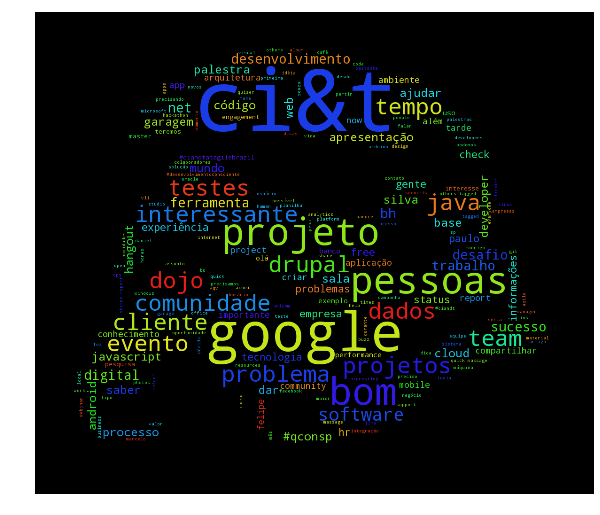

In [109]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from os import path
from scipy.misc import imread
%matplotlib inline

mask = imread("stormtrooper_mask.png")
wordcloud = WordCloud(width=800, height=800, mask=mask).generate_from_frequencies(global_relevant_words)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt

#Interpreting

Here are conducted important activities, like:  

<ul>
    <li>Drawing conclusions from the data</li>
    <li>Evaluating what your results mean</li>
    <li>Communicating your result</li>
</ul>

We did some of this during the explanation, so we let this for your inferences.  

Data products are a very nice way to allow your users to browse the data and get their own conclusions.
Python's <a href="http://bokeh.pydata.org/en/latest/">Bokeh</a> project is really nice for building interactive data produts. You can also export your results to JSON and present them in the great <a href="http://d3js.org/">D3.js</a>

Take a look at this data product example I build with Tableau, with a <a href="https://public.tableau.com/profile/gabriel.moreira#!/vizhome/Eleicoes2014_VisualizacaoDebateSBT/DashboardDebateSBT-01092014">dashboard of sentiment analysis of the Twitter posts during a presidential debate in TV</a>.

The slides of this presentation are available <a href="http://www.slideshare.net/gabrielspmoreira/python-for-data-science-48355555">here</a>. 